# **Machine learning from disaster**

**Kaggle competition**

In [1]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

# **Data Familiarization**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Variable	Definition	Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Find out all unique values in categorical features**

In [6]:
df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].apply(lambda x: x.unique())

Survived                   [0, 1]
Pclass                  [3, 1, 2]
Sex                [male, female]
SibSp       [1, 0, 3, 4, 2, 5, 8]
Parch       [0, 1, 2, 5, 3, 4, 6]
Embarked           [S, C, Q, nan]
dtype: object

# **Data cleaning**

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Fill the missing Embarked values with C, The are only two rows, so C was selected randomly.**

In [8]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
def fill_embarked(dataframe):
    dataframe['Embarked'] = dataframe['Embarked'].fillna('C')
    
fill_embarked(df)

In [10]:
df.loc[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


**Fill missing age values with mean age only for persons with Miss. prefix**

In [11]:
df_miss = df['Name'].str.contains('Miss.')
miss_mean_age = df[df_miss]['Age'].mean()
print(f"Average age of a person with Miss. prefix is {round(miss_mean_age,1)} years")

Average age of a person with Miss. prefix is 21.8 years


In [12]:
def fill_miss_age(dataframe):
    dataframe.loc[df_miss, 'Age'] = dataframe.loc[df_miss, 'Age'].fillna(miss_mean_age)

fill_miss_age(df)

**Fill remaining missing age values with mean age**

In [13]:
def fill_all_age(dataframe):
    dataframe.loc[:, 'Age'] = dataframe.loc[:, 'Age'].fillna(dataframe['Age'].mean())

fill_all_age(df)

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**Cabin has too many missing values, that do not indicate anything. Drop the column**

In [15]:
df.loc[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.318711,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
def drop_cabin(dataframe):
    dataframe.drop(columns='Cabin', axis=1, inplace=True)

drop_cabin(df)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No remaining missing values

# **Feature engineering**

**Create an Alone feature for persons that traveled alone**

In [18]:
def create_alone_col(dataframe):
    dataframe['Alone'] = df[['SibSp', 'Parch']].apply(lambda x: 1 if x[0] == 0 and x[1] == 0 else 0, axis=1)
    
create_alone_col(df)

# **Visualization**

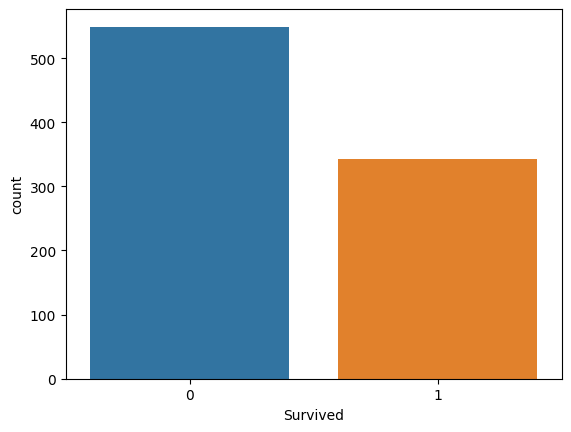

In [19]:
sns.countplot(data=df, x='Survived');

**Scatterplot for continous features**

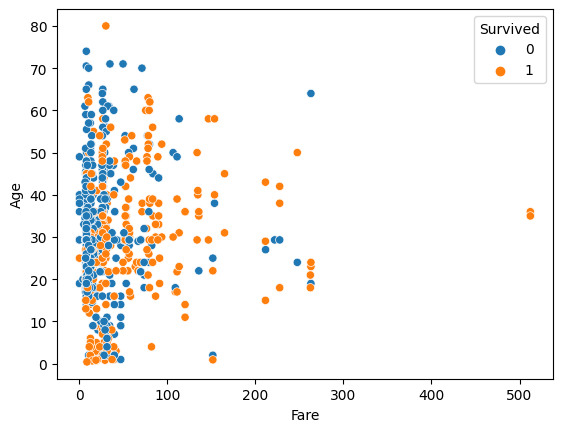

In [20]:
sns.scatterplot(data=df, x='Fare', y='Age', hue='Survived');

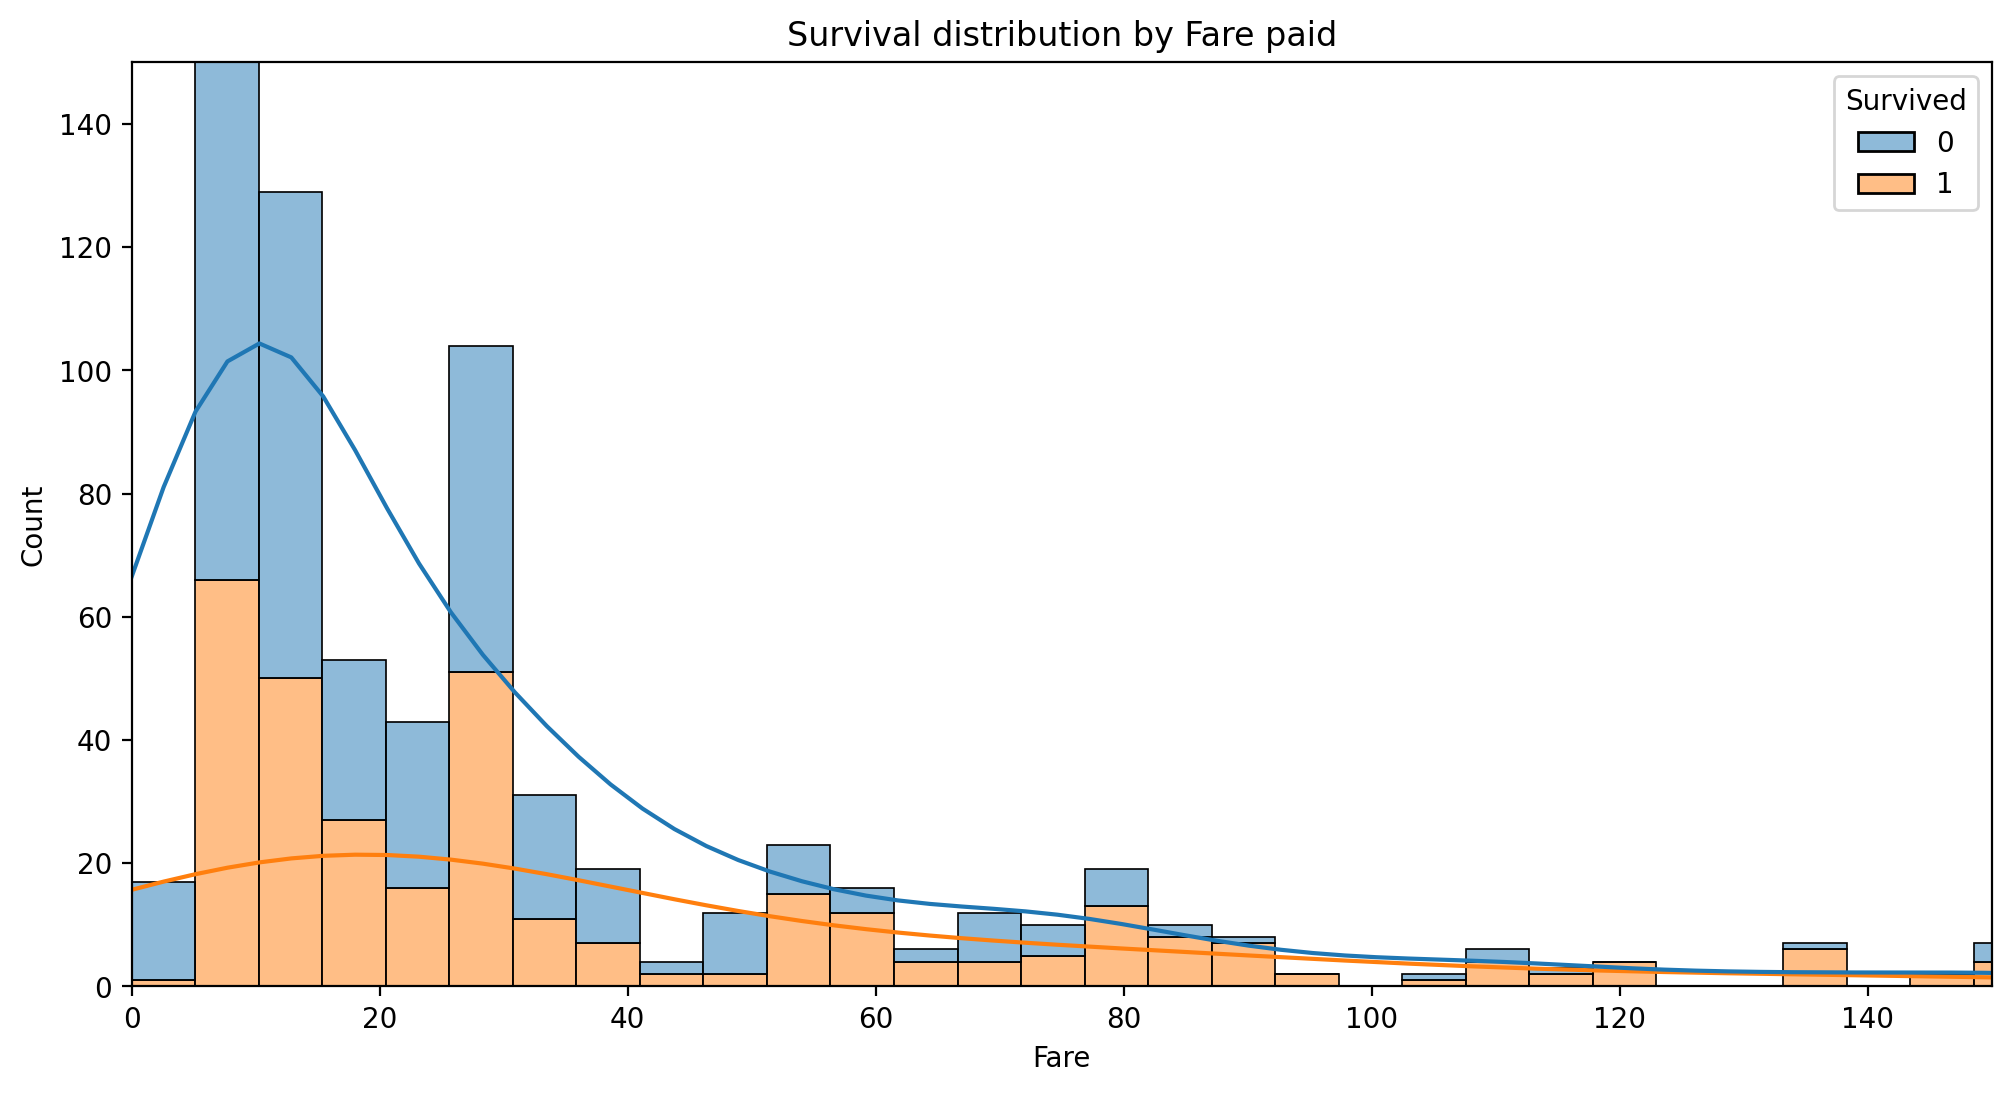

In [21]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=100, multiple='stack')
plt.ylim(0, 150)
plt.xlim(0,150);
plt.title('Survival distribution by Fare paid');

Those who paid higher fare have much larger chance to survive.

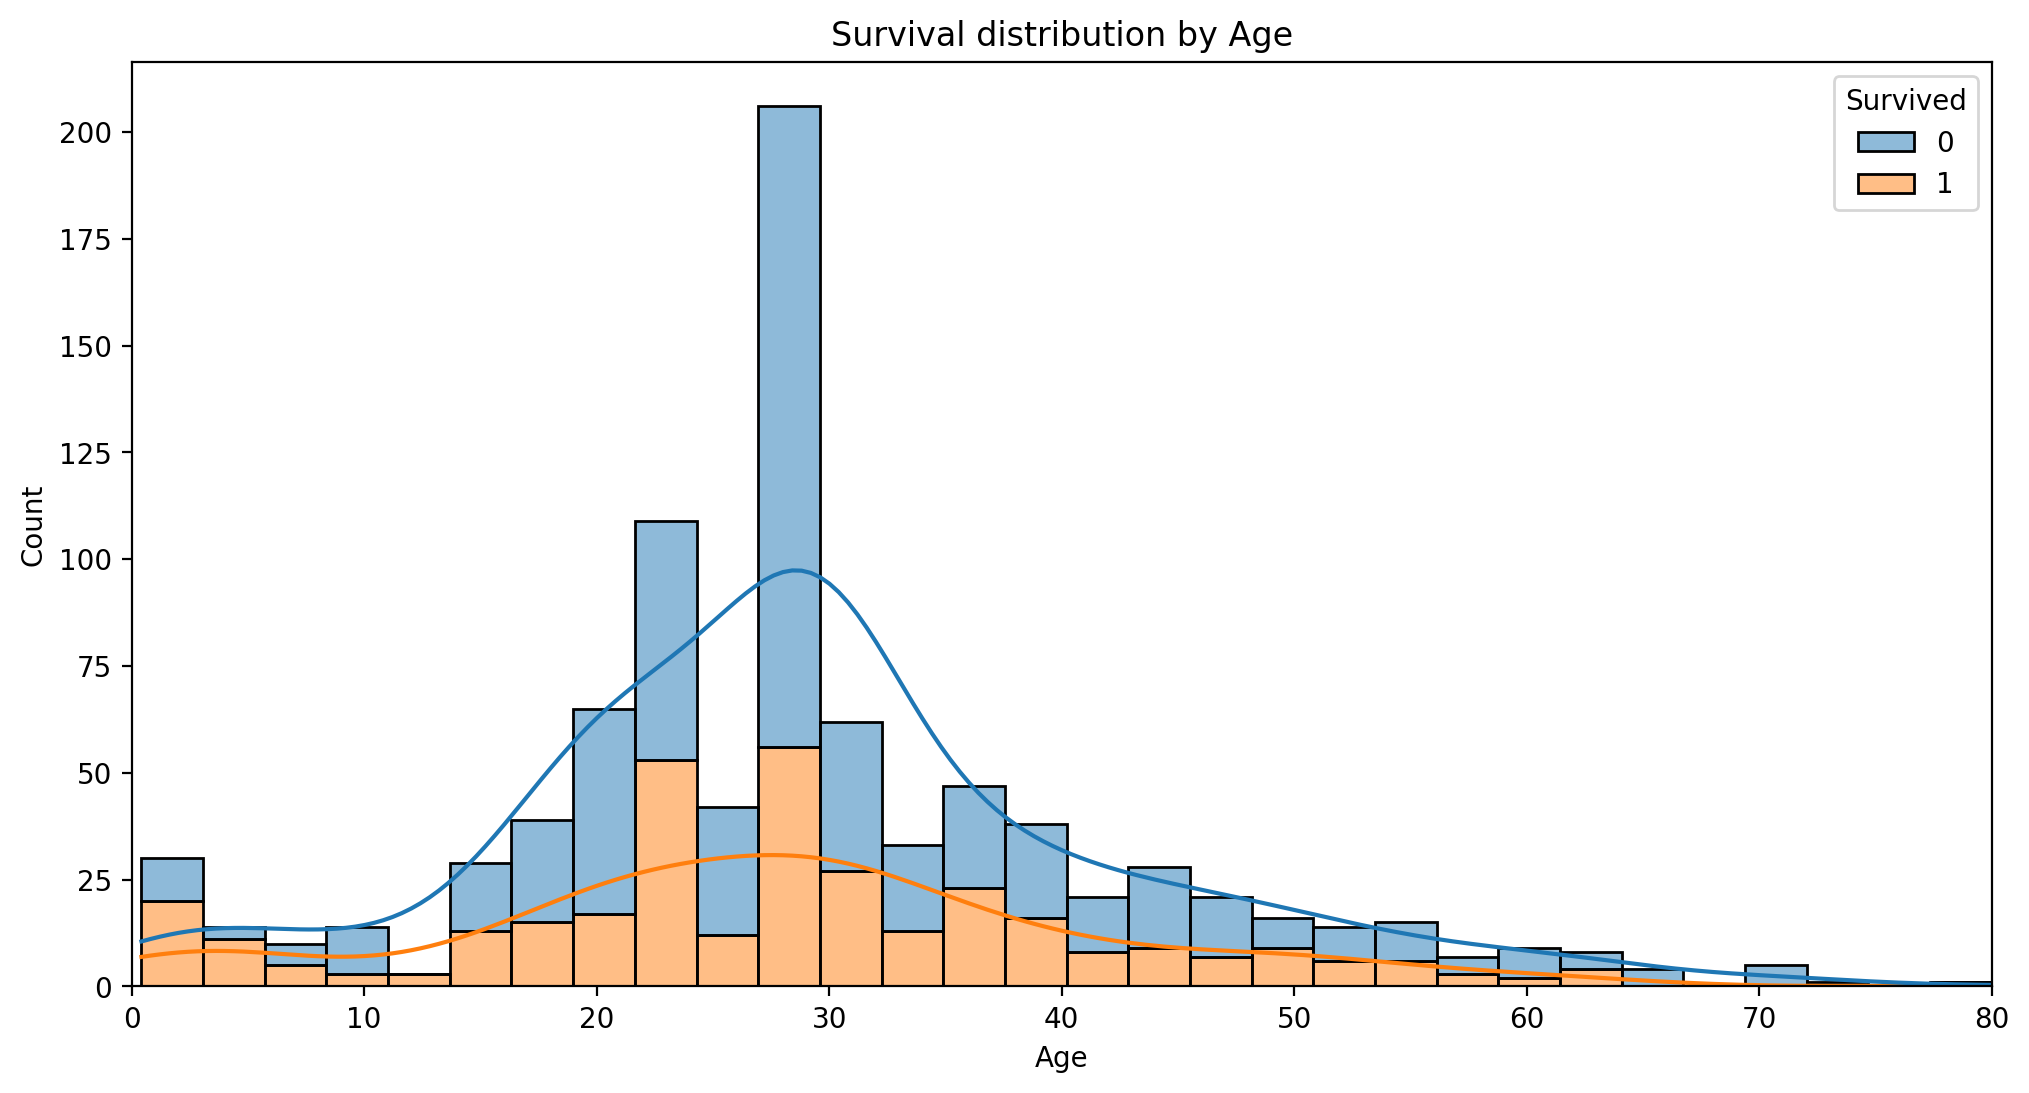

In [22]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.xlim(0,80)
plt.title('Survival distribution by Age');

Younglings with age less than five have higher chance to survive.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(0.0, 80.0)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


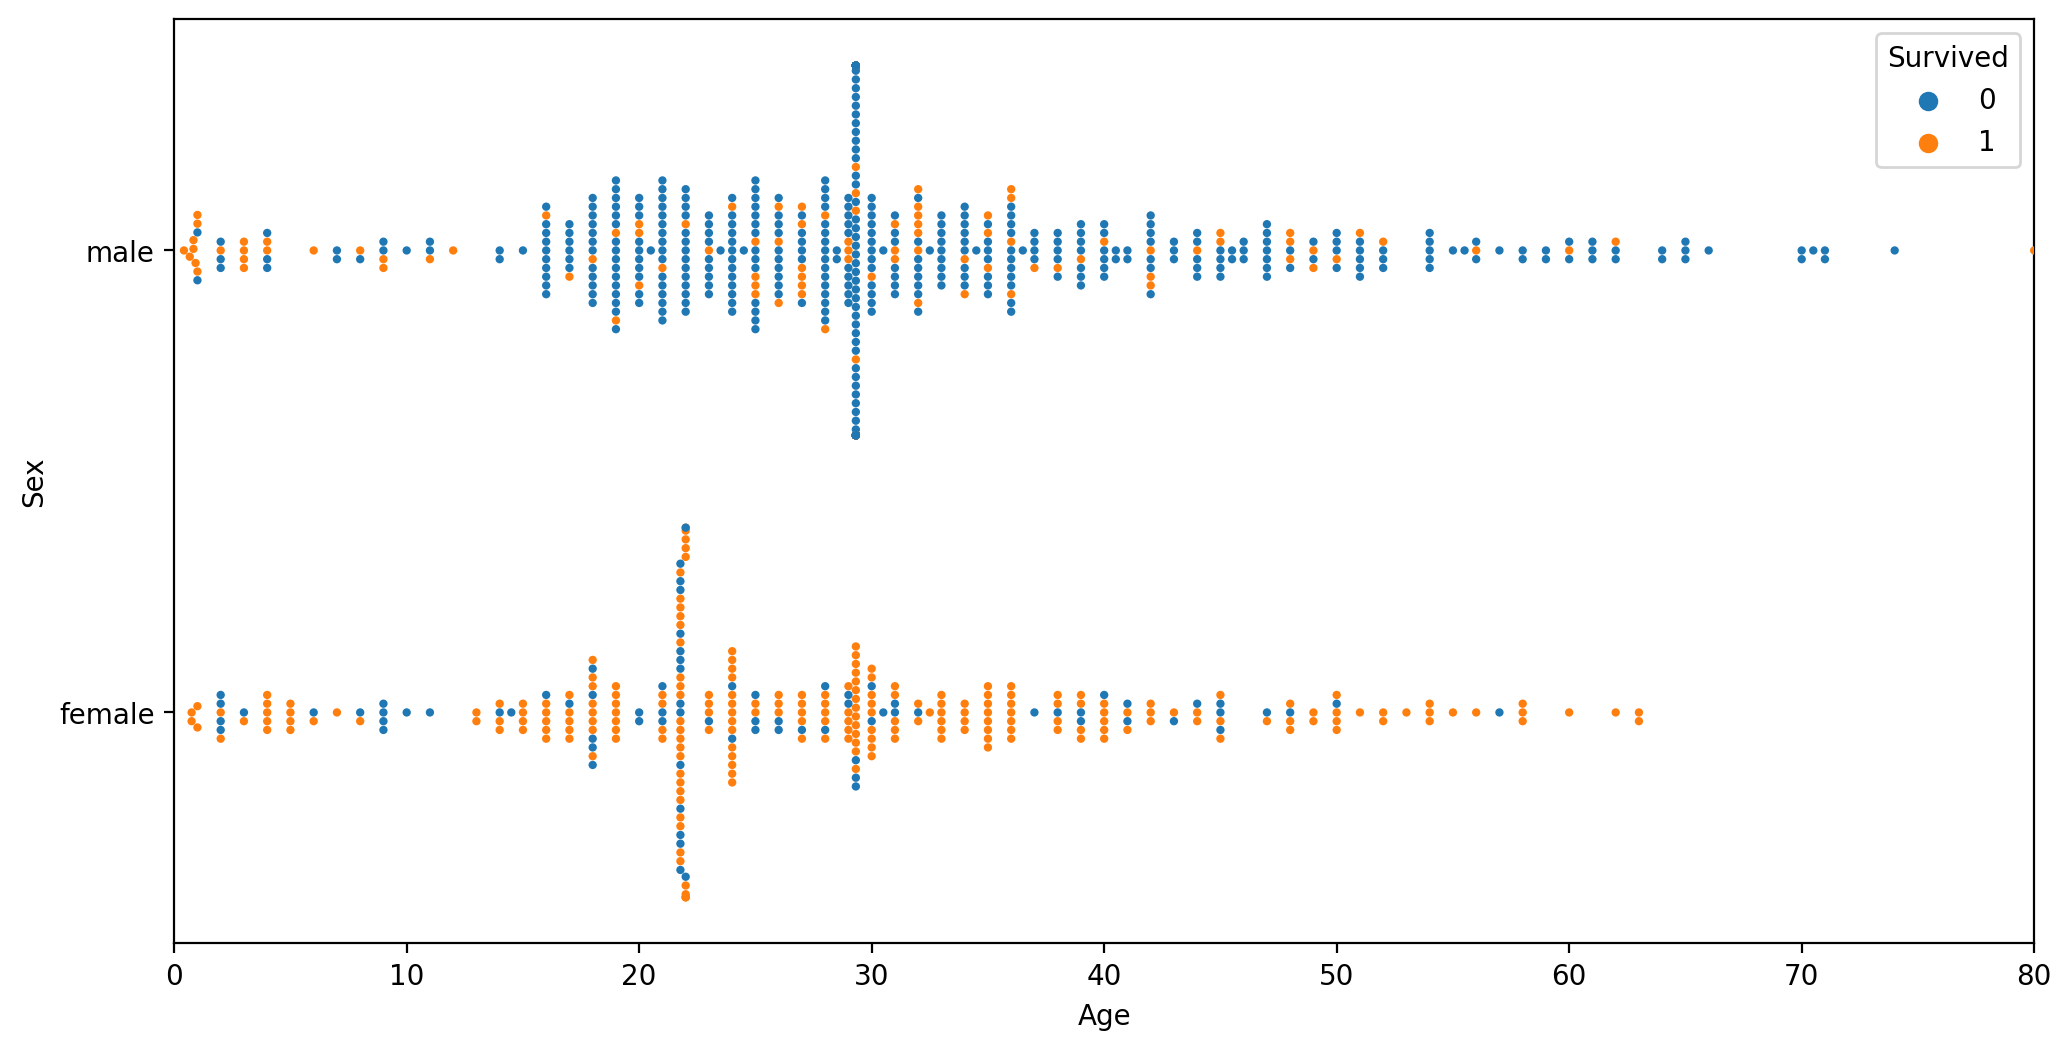

In [23]:
plt.figure(figsize=(12,6), dpi=200)
sns.swarmplot(data=df, x='Age', y='Sex', hue='Survived', size=3)
plt.xlim(0,80)

<Axes: xlabel='Sex', ylabel='count'>

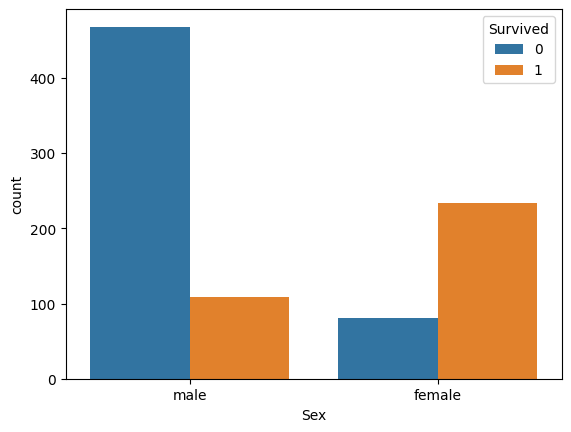

In [24]:
sns.countplot(data=df, x='Sex', hue='Survived')

Women throughout the entire age distribution were more likely to survive.

<Axes: xlabel='Alone', ylabel='count'>

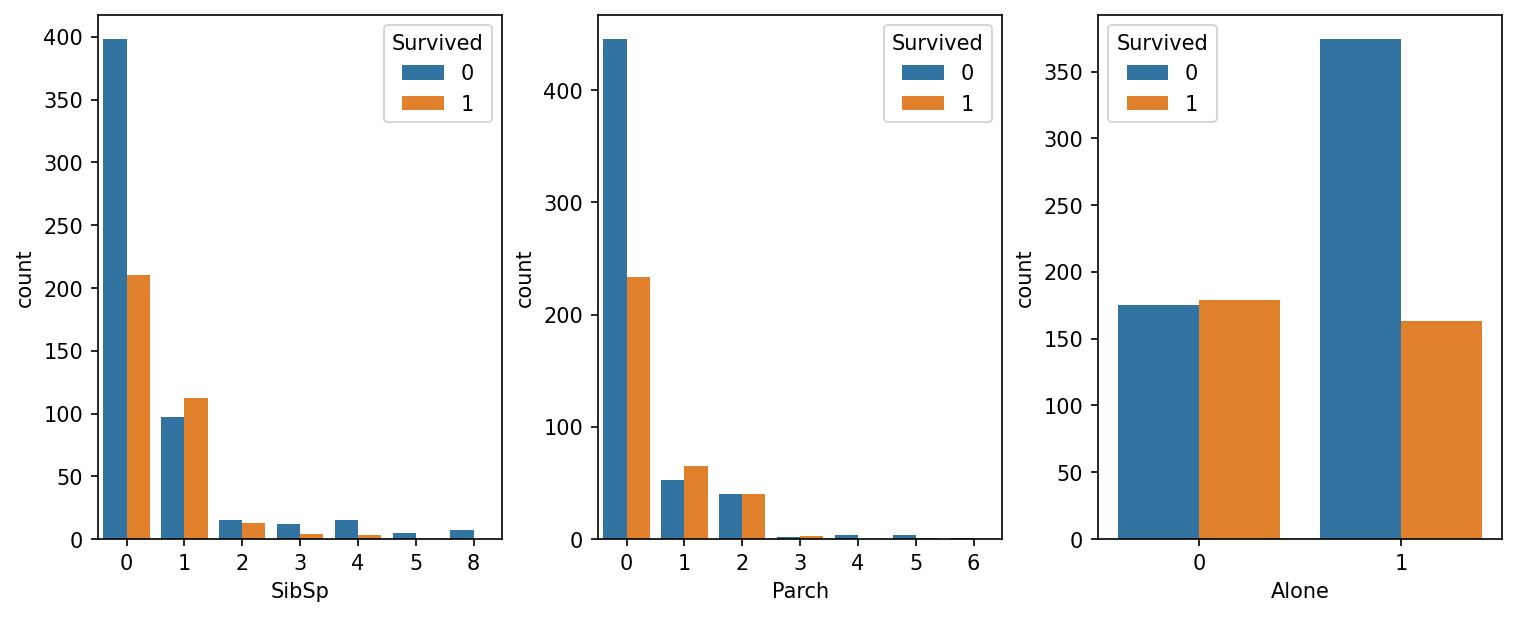

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 4),dpi=150, nrows=1, ncols=3, layout='constrained')


sns.countplot(data=df, x='SibSp', hue='Survived', ax=ax1)
sns.countplot(data=df, x='Parch', hue='Survived', ax=ax2)
sns.countplot(data=df, x='Alone', hue='Survived', ax=ax3)

Itt is clearly seen that people who traveled alone (SibSp and Parch = 0) were more likely to die than people traveling with someone.
Verified on the last chart with engineered Alone feature.

**Fare and PClass correlation**

In [26]:
# convert 'Pclass' column to strings 
df['Pclass'] = df['Pclass'].astype(str)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(0.0, 280.0)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 38.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


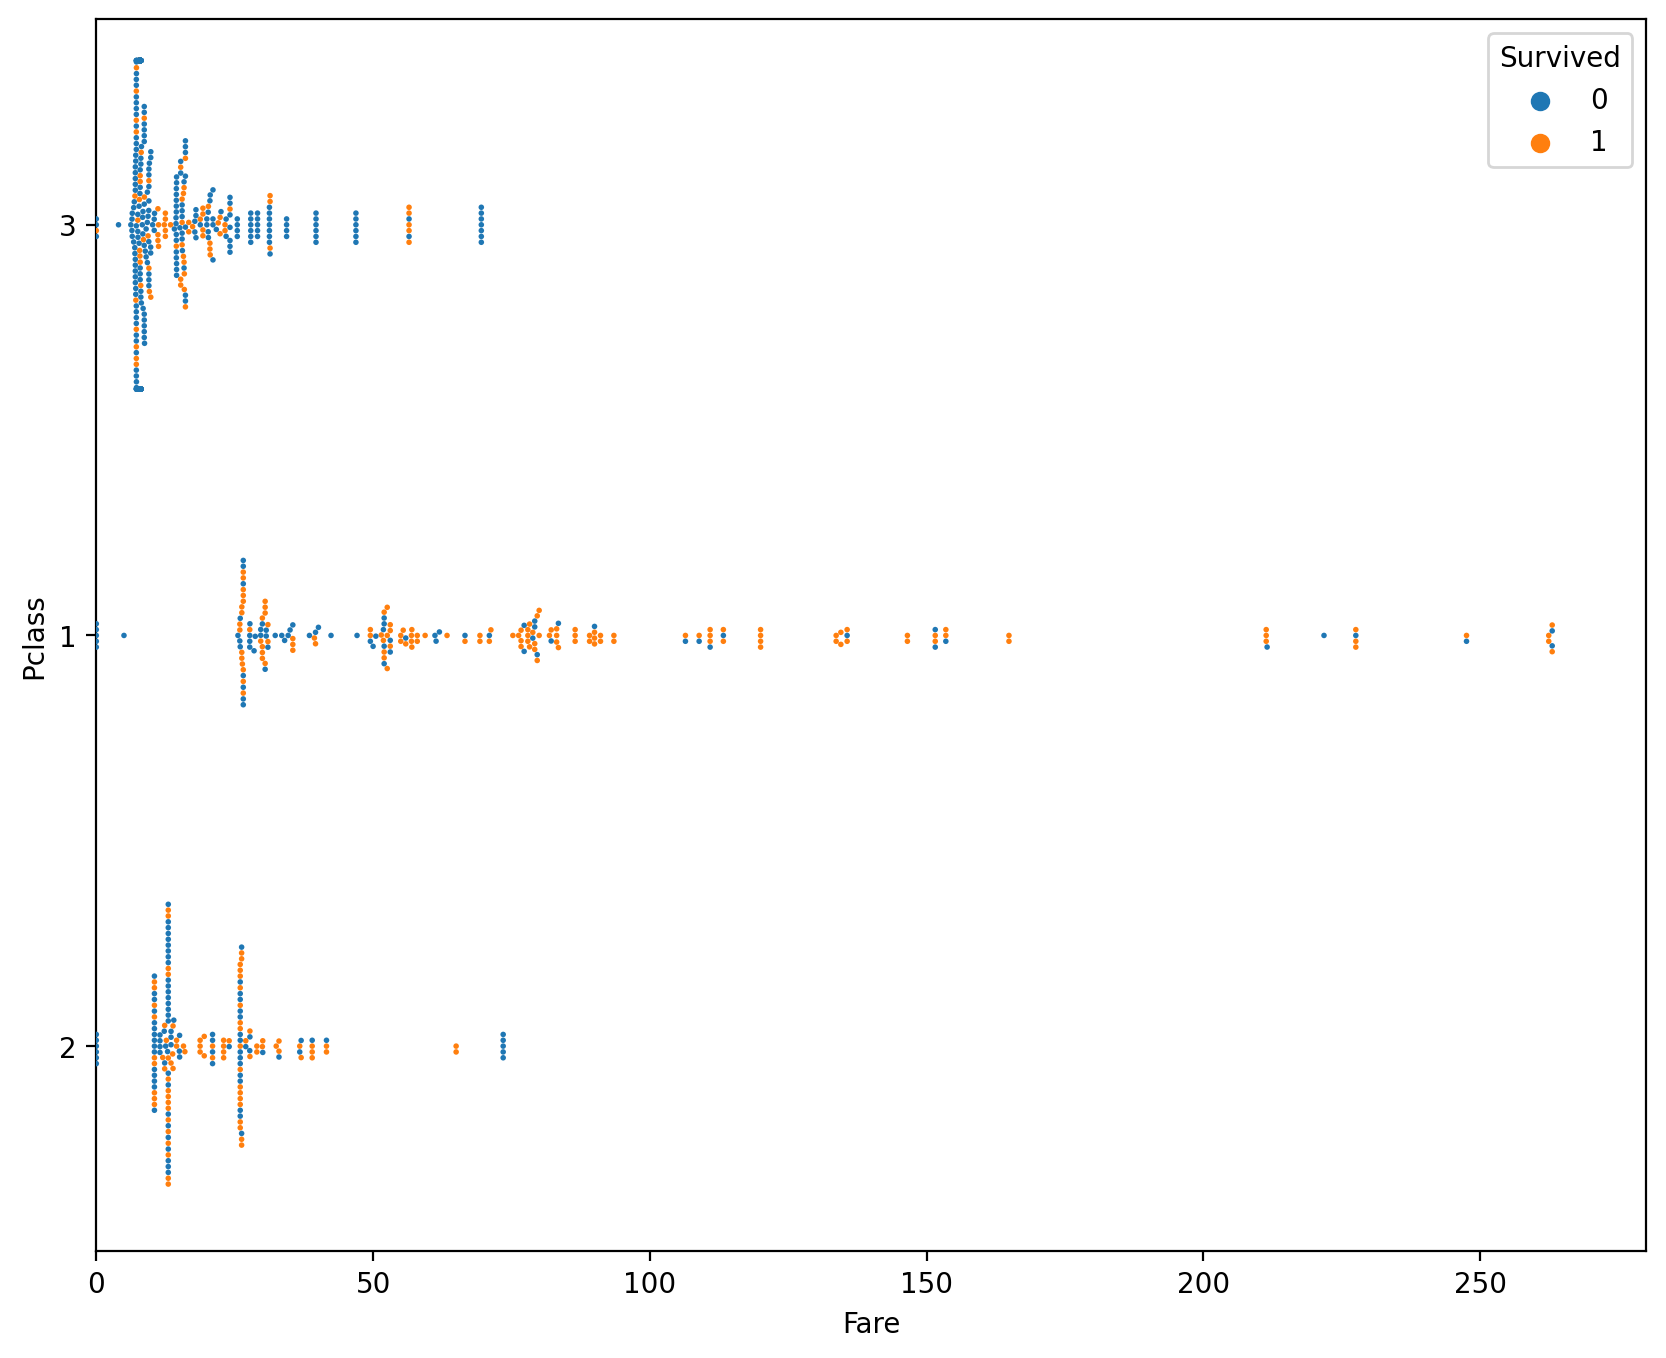

In [27]:
plt.figure(figsize=(10,8), dpi=200)
sns.swarmplot(data=df, x='Fare', y='Pclass', hue='Survived', size=2)
plt.xlim(0,280)

PClass 1 contains people who paid larger Fare. Also they were more likely to survive

<Axes: xlabel='Embarked', ylabel='count'>

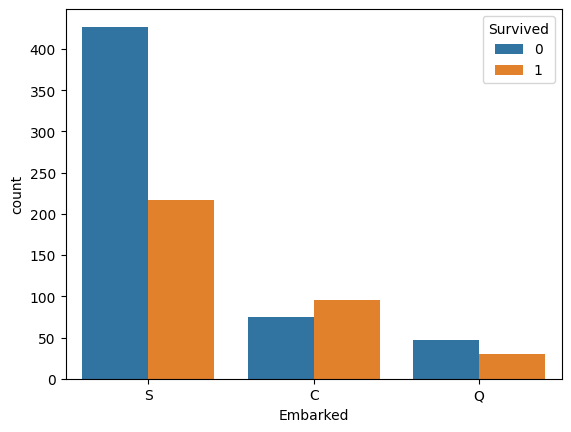

In [28]:
sns.countplot(data=df, x='Embarked', hue='Survived')

**Preparing the datagrame for machine learning**

In [29]:
df_final = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Alone', 'Survived']]
df_final = pd.get_dummies(df_final)

In [30]:
df_final.head()

,Age,SibSp,Parch,Fare,Alone,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,False,False,True,False,True,False,False,True
1,38.0,1,0,71.2833,0,1,True,False,False,True,False,True,False,False
2,26.0,0,0,7.9250,1,1,False,False,True,True,False,False,False,True
3,35.0,1,0,53.1000,0,1,True,False,False,True,False,False,False,True
4,35.0,0,0,8.0500,1,0,False,False,True,False,True,False,False,True


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Alone       891 non-null    int64  
 5   Survived    891 non-null    int64  
 6   Pclass_1    891 non-null    bool   
 7   Pclass_2    891 non-null    bool   
 8   Pclass_3    891 non-null    bool   
 9   Sex_female  891 non-null    bool   
 10  Sex_male    891 non-null    bool   
 11  Embarked_C  891 non-null    bool   
 12  Embarked_Q  891 non-null    bool   
 13  Embarked_S  891 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 48.9 KB


**Features correlation**

<Axes: >

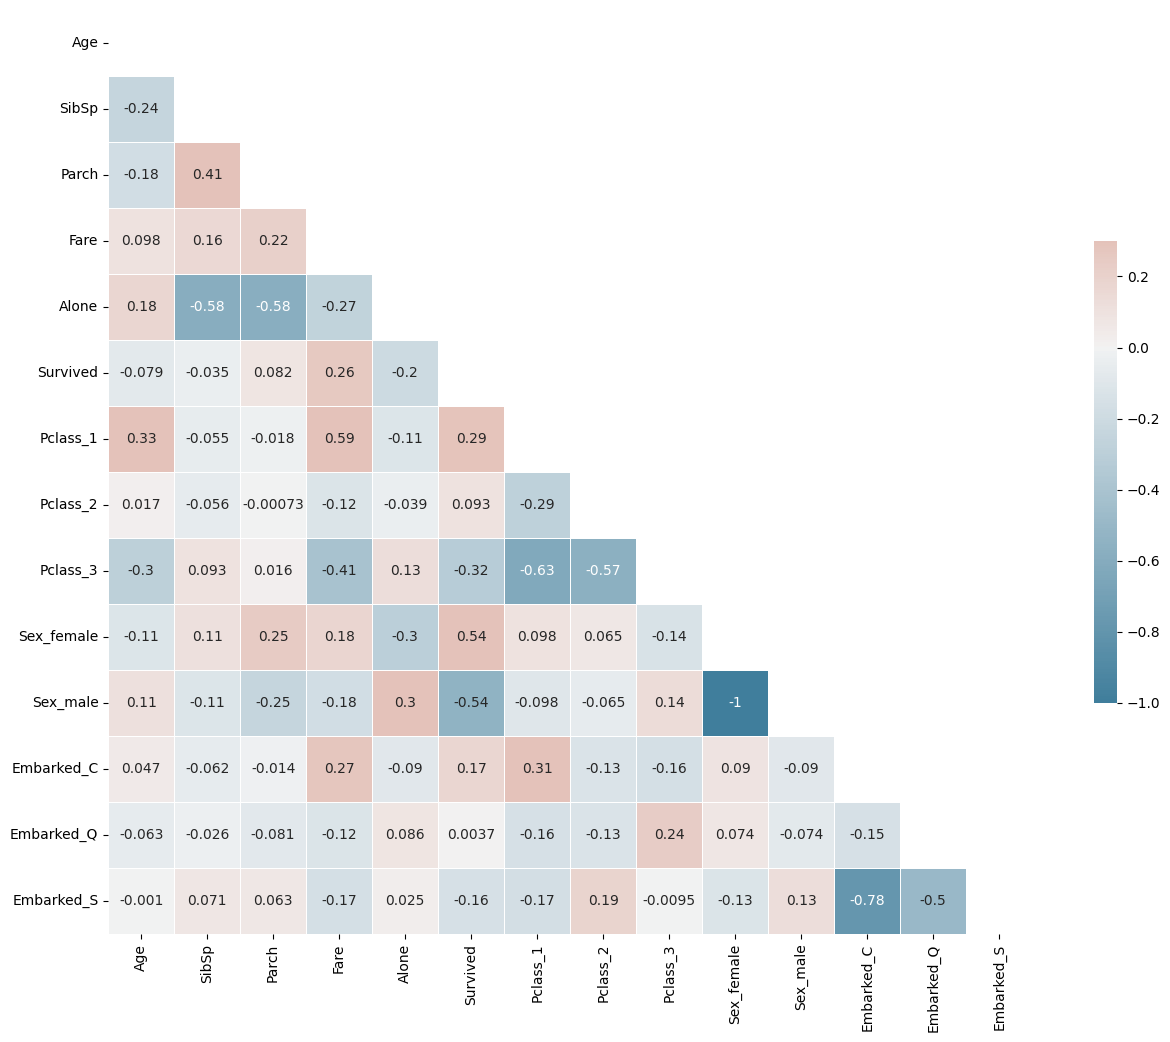

In [32]:
corr = df_final.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


# **Machine learning on train dataset**

In [33]:
X=df_final.drop('Survived', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Alone       891 non-null    int64  
 5   Pclass_1    891 non-null    bool   
 6   Pclass_2    891 non-null    bool   
 7   Pclass_3    891 non-null    bool   
 8   Sex_female  891 non-null    bool   
 9   Sex_male    891 non-null    bool   
 10  Embarked_C  891 non-null    bool   
 11  Embarked_Q  891 non-null    bool   
 12  Embarked_S  891 non-null    bool   
dtypes: bool(8), float64(2), int64(3)
memory usage: 41.9 KB


In [34]:
y=df_final['Survived']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


**Scaling the data**

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training and test data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Check for the best machine learning model**

In [36]:
from lazypredict.Supervised import LazyClassifier
lazy_classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,prediction = lazy_classifier.fit(X_train_scaled, X_test_scaled, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 11.34it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.82,0.81,0.81,0.82,0.11
SVC,0.82,0.80,0.80,0.82,0.07
LogisticRegression,0.81,0.80,0.80,0.81,0.04
BernoulliNB,0.81,0.80,0.80,0.81,0.02
LabelPropagation,0.81,0.79,0.79,0.81,0.13
DecisionTreeClassifier,0.81,0.79,0.79,0.81,0.02
SGDClassifier,0.81,0.79,0.79,0.81,0.06
LabelSpreading,0.81,0.79,0.79,0.81,0.14
AdaBoostClassifier,0.80,0.79,0.79,0.80,0.13


From the table above, it is probably best to use Support Vector Classifier (SVC)

**Training the Support Vector Classifier with cross validation.**

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the SVC
param_grid = {'C': [0.1, 1, 10, 80, 100, 120], 'gamma': [0.001, 0.01, 0.08, 0.1, 0.2, 1], 'kernel': ['linear', 'rbf']}

svc = SVC()

# Create a GridSearchCV object with the SV classifier and the parameter grid
grid_search = GridSearchCV(svc, param_grid, cv=10)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score found by the grid search
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}%".format(grid_search.best_score_*100))

# Predict the labels of the scaled test data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test_scaled)


Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 82.27%


**Display the confusion metrix**

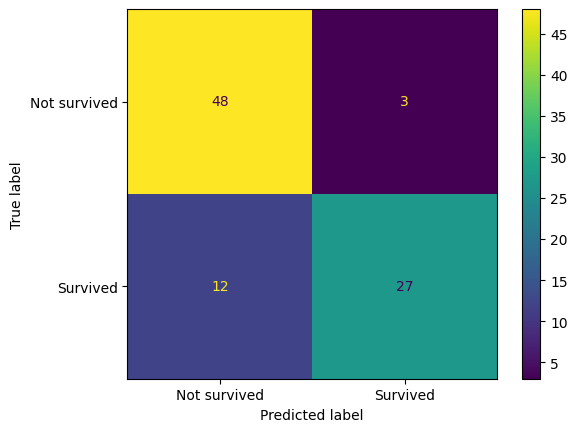

In [38]:
# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not survived', 'Survived'])
disp.plot()

In [39]:
# The accuracy_score function is a general metric function that can be used to compare any two arrays of labels or predictions, regardless of the model or estimator used.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8333333333333334

In [40]:
# The model.score method is a specific method of each estimator or model that provides a default evaluation criterion for the problem they are designed to solve. For classifiers, such as grid_search, the default score method is usually the mean accuracy on the given test data and labels.
score_train = grid_search.score(X_train_scaled, y_train)
print(f'The model accuracy score on train set data is: {score_train*100:.2f}%')

The model accuracy score on train set data is: 84.27%


**Retrain the model on the entire train dataset**

In [41]:
# Create a final model retrained on all the data, use the best parameters for this model 
# Scale the complete dataset
scaler_final = StandardScaler()
scaler_final.fit(X)

X_scaled = scaler_final.transform(X)

# Create a new SVC model with the best parameters
svc_final = SVC(C=grid_search.best_params_['C'],
                gamma=grid_search.best_params_['gamma'],
                kernel=grid_search.best_params_['kernel'])

# Retrain the model on the complete dataset
svc_final.fit(X_scaled, y)

# Confirm that the model has been retrained on all data
score_final = svc_final.score(X_scaled, y) 
print(f'The final model accuracy score when retrained on all data is: {score_final*100:.2f}%')

The final model accuracy score when retrained on all data is: 84.18%


# **Predicting labels on test dataset**

**Load a test dataset**

In [42]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

**Fill missing values for the test dataset**

In [43]:
fill_embarked(test_df)
fill_miss_age(test_df)
fill_all_age(test_df)
drop_cabin(test_df)
create_alone_col(test_df)
test_df['Pclass'] = test_df['Pclass'].astype(str)

In [44]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Alone          0
dtype: int64

In [45]:
missing_fare = test_df.loc[test_df['Fare'].isnull()]
missing_fare

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
152,1044,3,"Storey, Mr. Thomas",male,60.50,0,0,3701,NaN,S,1


In [46]:
test_df.loc[test_df['Fare'].isnull()] = missing_fare.fillna(test_df['Fare'].mean())

In [47]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,S,1


In [48]:
final_test_df = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Alone']]
final_test_df = pd.get_dummies(final_test_df)

In [49]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Alone       418 non-null    int64  
 5   Pclass_1    418 non-null    bool   
 6   Pclass_2    418 non-null    bool   
 7   Pclass_3    418 non-null    bool   
 8   Sex_female  418 non-null    bool   
 9   Sex_male    418 non-null    bool   
 10  Embarked_C  418 non-null    bool   
 11  Embarked_Q  418 non-null    bool   
 12  Embarked_S  418 non-null    bool   
dtypes: bool(8), float64(2), int64(3)
memory usage: 19.7 KB


**Scale the test data**

In [50]:
# First, scale the test data using the final scaler
final_test_df_scaled = scaler_final.transform(final_test_df)

**Predict the labels for the test dataset using svc_final model**

In [51]:
test_predictions = svc_final.predict(final_test_df_scaled)

In [52]:
test_df['Survived'] = test_predictions
test_df['Survived']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [53]:
test_df['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [54]:
final_output = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_df['Survived']
})

final_output.to_csv('/kaggle/working/submission.csv', index=False)

**The Submission score on Kaggle is 77.7%**